                      Tatiana Weaver | Code Fellows | November 18, 2016
# 2016 New Coder Survey: data analysis and visualization
* A survey of 15,000+ people who are actively learning to code, 48 questions
* Surveyed by Free Code Camp and CodeNewbie.org
* Data source: kaggle.com/freecodecamp/2016-new-coder-survey-
* For 'country' criterion used "CountryLive" column 

### Motivation
* Being a junior developer myself, I was interested in demographics of the people who are actively learning to code around the world.
* Are USA demographics different from the rest of the world?

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier as KN
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [59]:
data = pd.read_csv("2016-FCC-New-Coders-Survey-Data.csv", low_memory=False)

## Initial Cleaning and Processing

### Let's take a look what we are dealing with in the dataset

In [60]:
print("Columns in the dataset (total: {})".format(len(data.columns)))
print(data.columns[:55], data.columns[55:])

Columns in the dataset (total: 113)
Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampFullJobAfter',
       'BootcampLoanYesNo', 'BootcampMonthsAgo', 'BootcampName',
       'BootcampPostSalary', 'BootcampRecommend', 'ChildrenNumber',
       'CityPopulation', 'CodeEventBootcamp', 'CodeEventCoffee',
       'CodeEventConferences', 'CodeEventDjangoGirls', 'CodeEventGameJam',
       'CodeEventGirlDev', 'CodeEventHackathons', 'CodeEventMeetup',
       'CodeEventNodeSchool', 'CodeEventNone', 'CodeEventOther',
       'CodeEventRailsBridge', 'CodeEventRailsGirls', 'CodeEventStartUpWknd',
       'CodeEventWomenCode', 'CodeEventWorkshop', 'CommuteTime',
       'CountryCitizen', 'CountryLive', 'EmploymentField',
       'EmploymentFieldOther', 'EmploymentStatus', 'EmploymentStatusOther',
       'ExpectedEarning', 'FinanciallySupporting', 'Gender', 'HasChildren',
       'HasDebt', 'HasFinancialDependents', 'HasHighSpdInternet',
       'HasHomeMortgage', 'HasServedInMilitary', 'HasStudentD

### Let's define datasets with columns of interest for further analyses

In [61]:
# Datasets for descriptive statistics
data_gender = data.Gender.dropna()
data_gender_country = data[["Gender", "CountryLive"]].dropna()
data_age_gen_country = data[["Age", "Gender", "CountryLive"]].dropna()
data_inc_gen_country = data[["Income", "Gender", "CountryLive"]].dropna()
data_female_country = data[["Gender", "CountryLive"]].dropna()
data_bc_gender = data[["Gender", "AttendedBootcamp"]].dropna()

## Exploratory Analysis

### To begin, let's take a look at the age, gender, bootcamp attendance, country of residence, and programming experience of the participants

In [95]:
####################
# Gender distribution overall
print()
print("Demographics, bootcamp attendance, and programming experience")
print()
print()
print("-----------------------------------------------------------------")
print("Total number of participants: {}".format(len(data)))
print("Number of countries of residence represented in the survey: {}".format(len(data.CountryLive.unique())))
print("-----------------------------------------------------------------")
print("Top 20 countries by number of participants:")
print()
print(data.CountryLive.dropna().value_counts()[:20])

print("-----------------------------------------------------------------")
print("Gender ({} ppl):".format(data_gender.count()))
print()

female_percent = data_gender[data_gender == "female"].count() * 100 / total_num1
male_percent = data_gender[data_gender == "male"].count() * 100 / total_num1

print("Female: {}%".format(round(female_percent, 1)))
print("Male: {}%".format(round(male_percent, 1)))
print("Other: {}%".format(round((100 - female_percent - male_percent), 1)))
print("-----------------------------------------------------------------")

####################
# Female vs Male by country
data_gender_usa = data_gender_country[data_gender_country.CountryLive == "United States of America"]
data_gender_other = data_gender_country[data_gender_country.CountryLive != "United States of America"]

data_fem_usa = data_gender_usa[data_gender_usa.Gender == "female"]
data_fem_other = data_gender_other[data_gender_other.Gender == "female"]

female_percent_usa = len(data_fem_usa) * 100 / len(data_gender_usa)
female_percent_other = len(data_fem_other) * 100 / len(data_gender_other)

print("Percent of women among participants:")
print()
print("USA ({} ppl): {}%".format(
        len(data_gender_usa),
        round(female_percent_usa, 1)))

print("The rest of the world ({} ppl): {}%".format(
        len(data_gender_other),
        round(female_percent_other, 1)
       )
     )

####################
# Bootcamp attendance for men vs women
fem_bc_all = data_bc_gender[data_bc_gender.Gender == "female"]
male_bc_all = data_bc_gender[data_bc_gender.Gender == "male"]

fem_bc = 100 * len(fem_bc_all[fem_bc_all.AttendedBootcamp == 1.]) / len(fem_bc_all)
male_bc = 100 * len(male_bc_all[male_bc_all.AttendedBootcamp == 1.]) / len(male_bc_all)
print("-----------------------------------------------------------------")
data_bc_count = data.BootcampName.dropna()
print("List of top 20 bootcamps attended (total number of bootcamps: {}):".format(len(data_bc_count)))
print()
print(data_bc_count.value_counts()[:20])
print("-----------------------------------------------------------------")
print("Bootcamp attendance by gender({} ppl):".format(len(data_bc_gender)))
print()
print("{}% of female participants attended a bootcamp".format(round(fem_bc, 1)))
print("{}% of male participants attended a bootcamp".format(round(male_bc, 1)))



Demographics, bootcamp attendance, and programming experience


-----------------------------------------------------------------
Total number of participants: 15620
Number of countries of residence represented in the survey: 157
-----------------------------------------------------------------
Top 20 countries by number of participants:

United States of America         6265
India                             981
United Kingdom                    618
Canada                            542
Brazil                            269
Australia                         263
Germany                           255
Russia                            251
Ukraine                           224
Poland                            202
Spain                             144
Netherlands (Holland, Europe)     137
France                            134
Romania                           131
Italy                             118
Mexico                            106
South Africa                      102
Philippines 


Average age (yr): 29.2
Average number of month programming: 24.4
Average income ($): 44930.0


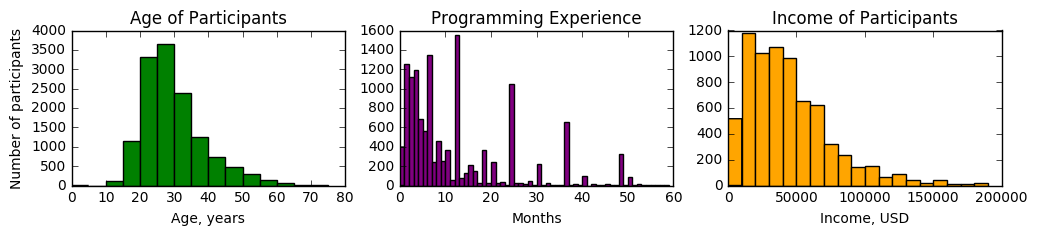

In [89]:
#Income, Age, programming experience
print()
print("Average age (yr):", round(data.Age.dropna().mean(), 1))
print("Average number of month programming:", round(data.MonthsProgramming.mean(), 1))
print("Average income ($):", round(data.Income.mean(), 1))
# Visualization of Age, Months Programming and Income, 3 subplots
plt.figure(figsize=(12, 2))
ax1 = plt.subplot(1, 3, 1)
ax1.hist(data.Age.dropna(), color='green', bins=np.arange(0, 80, 5), label="Male")
ax1.set_title("Age of Participants")
ax1.set_xlabel("Age, years")
ax1.set_ylabel("Number of participants")

ax2 = plt.subplot(1, 3, 2)
ax2.hist(data.MonthsProgramming.dropna(), color='purple', bins=np.arange(0, 60, 1), label="Female")
ax2.set_title("Programming Experience")
ax2.set_xlabel("Months")

ax3 = plt.subplot(1, 3, 3)
ax3.hist(data.Income.dropna(), color='Orange', bins=np.arange(0, 200000, 10000), label="Male")
ax3.set_title("Income of Participants")
ax3.set_xlabel("Income, USD")

plt.show()

### Is there a difference in age and income distribition between men and women?
### Does this difference look the same in USA compared to the rest of the world?


Age by gender: USA vs. the rest of the world
------------------------------------------------
  Country   Women (yr)     Men (yr)    Diff          t-Test
0             Avg  Std     Avg  Std    (yr)    t-st   p-val
1                                                          
2     USA    32.3  9.6      31  9.6     1.3    -4.7       0
3   Other    28.1  8.1    27.4    8     0.7    -2.5  0.0122



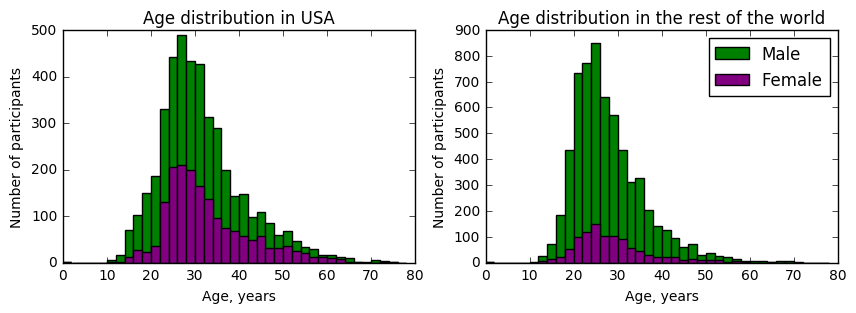


Income by gender: USA vs. the rest of the world
------------------------------------------------
  Country      Women      ($)        Men      ($)      Diff          t-Test
0                Avg      Std        Avg      Std       ($)    t-st   p-val
1                                                                          
2     USA    46711.9  29646.7    55532.3  37649.3    8820.4     7.5       0
3   Other    34122.7  28414.1    36123.9  33622.4    2001.2     1.3  0.1897



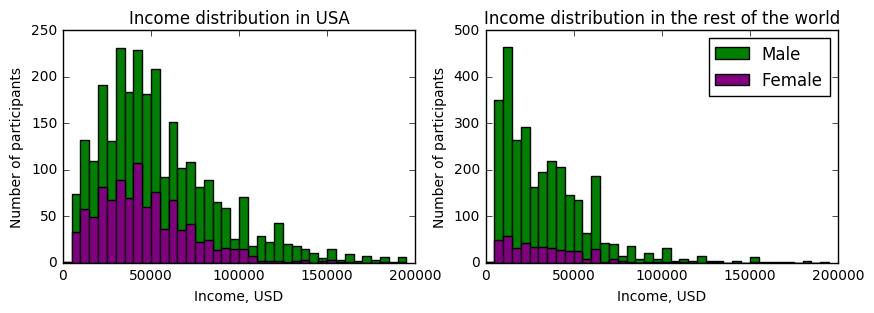

In [119]:
# Investigate difference in age between men and women, USA vs the rest of the world

# Data <Gender, Age, Country>: split to USA and Other countries
data_age_gender_usa = data_age_gen_country[data_age_gen_country.CountryLive == "United States of America"]
data_age_gender_other = data_age_gen_country[data_age_gen_country.CountryLive != "United States of America"]

# For USA Age data: split to female and male data
data_male_age_usa = data_age_gender_usa[data_age_gender_usa.Gender == 'male'].Age
data_fem_age_usa = data_age_gender_usa[data_age_gender_usa.Gender == 'female'].Age

# For Other countries Age data: split to female and male data
data_male_age_other = data_age_gender_other[data_age_gender_other.Gender == 'male'].Age
data_fem_age_other = data_age_gender_other[data_age_gender_other.Gender == 'female'].Age

# USA: Avg age and std.dev by gender
women_age_avg_usa = data_fem_age_usa.mean()
men_age_avg_usa = data_male_age_usa.mean()
difference_age_usa = women_age_avg_usa - men_age_avg_usa

women_age_std_usa = data_fem_age_usa.std()
men_age_std_usa = data_male_age_usa.std()

tstat_usa, pval_usa = ttest_ind(data_male_age_usa, data_fem_age_usa, equal_var=False)

# Other countries: Avg age and std.dev by gender
women_age_avg_other = data_fem_age_other.mean()
men_age_avg_other = data_male_age_other.mean()
difference_age_other = women_age_avg_other - men_age_avg_other

women_age_std_other = data_fem_age_other.std()
men_age_std_other = data_male_age_other.std()

tstat_other, pval_other = ttest_ind(data_male_age_other, data_fem_age_other, equal_var=False)


# DF that holds all the calculated results
age_country_stats = pd.DataFrame(
[
        ["", "", "Avg", "Std", "", "Avg", "Std", "", "(yr)", "", "t-st", "p-val"],
        ["", "", "", "", "", "", "", "", "", "", "", ""],
        ["USA",
         "",
         round(women_age_avg_usa, 1),
         round(women_age_std_usa, 1),
         "",
         round(men_age_avg_usa, 1),
         round(men_age_std_usa, 1),
         "",
         round(difference_age_usa, 1),
         "",
         round(tstat_usa, 1),
         round(pval_usa, 4)
        ],
        ["Other",
         "",
         round(women_age_avg_other, 1),
         round(women_age_std_other, 1),
         "",
         round(men_age_avg_other, 1),
         round(men_age_std_other, 1),
         "",
         round(difference_age_other, 1),
         "",
         round(tstat_other, 1),
         round(pval_other, 4)
        ]
],
        columns=[
            "Country",
            "",
            "Women",
            "(yr)",
            "",
            "Men",
            "(yr)",
            "",
            "Diff",
            "",
            "",
            "t-Test",
        ]
)

print()
print("Age by gender: USA vs. the rest of the world")
print("------------------------------------------------")
print(age_country_stats)
print()

# Visualize Age distribution for men and women

bins=np.arange(0, 80, 2)
plt.figure(figsize=(10, 3))
ax1 = plt.subplot(1, 2, 1)
ax1.hist(data_male_age_usa, color='green', bins=bins, label="Male")
ax1.hist(data_fem_age_usa, color='purple', bins=bins, label="Female")
ax1.set_title("Age distribution in USA")
ax1.set_xlabel("Age, years")
ax1.set_ylabel("Number of participants")

ax2 = plt.subplot(1, 2, 2)
ax2.hist(data_male_age_other, color='green', bins=bins, label="Male")
ax2.hist(data_fem_age_other, color='purple', bins=bins, label="Female")
ax2.set_title("Age distribution in the rest of the world")
ax2.set_xlabel("Age, years")
ax2.set_ylabel("Number of participants")
plt.legend()

plt.show()

########################################################
# Investigate difference in income between men and women, USA vs other countries

# Data <Gender, Income Country>: split to USA and Other countries
data_inc_gender_usa = data_inc_gen_country[data_inc_gen_country.CountryLive == "United States of America"]
data_inc_gender_other = data_inc_gen_country[data_inc_gen_country.CountryLive != "United States of America"]

# For USA Income data: split to female and male data
data_male_inc_usa = data_inc_gender_usa[data_inc_gender_usa.Gender == 'male'].Income
data_fem_inc_usa = data_inc_gender_usa[data_inc_gender_usa.Gender == 'female'].Income

# For Other countries Income data: split to female and male data
data_male_inc_other = data_inc_gender_other[data_inc_gender_other.Gender == 'male'].Income
data_fem_inc_other = data_inc_gender_other[data_inc_gender_other.Gender == 'female'].Income

# USA: Avg Income and std.dev by gender
women_inc_avg_usa = data_fem_inc_usa.mean()
men_inc_avg_usa = data_male_inc_usa.mean()

difference_inc_usa = men_inc_avg_usa - women_inc_avg_usa

women_inc_std_usa = data_fem_inc_usa.std()
men_inc_std_usa = data_male_inc_usa.std()

tstat_usa, pval_usa = ttest_ind(data_male_inc_usa, data_fem_inc_usa, equal_var=False)

# Other countries: Avg Income and std.dev by gender
women_inc_avg_other = data_fem_inc_other.mean()
men_inc_avg_other = data_male_inc_other.mean()

difference_inc_other = men_inc_avg_other - women_inc_avg_other

women_inc_std_other = data_fem_inc_other.std()
men_inc_std_other = data_male_inc_other.std()

tstat_other, pval_other = ttest_ind(data_male_inc_other, data_fem_inc_other, equal_var=False)


# DF that holds all the calculated results
inc_country_stats = pd.DataFrame(
[
        ["", "", "Avg", "Std", "", "Avg", "Std", "", "($)", "", "t-st", "p-val"],
        ["", "", "", "", "", "", "", "", "", "", "", ""],
        ["USA",
         "",
         round(women_inc_avg_usa, 1),
         round(women_inc_std_usa, 1),
         "",
         round(men_inc_avg_usa, 1),
         round(men_inc_std_usa, 1),
         "",
         round(difference_inc_usa, 1),
         "",
         round(tstat_usa, 1),
         round(pval_usa, 4)
        ],
        ["Other",
         "",
         round(women_inc_avg_other, 1),
         round(women_inc_std_other, 1),
         "",
         round(men_inc_avg_other, 1),
         round(men_inc_std_other, 1),
         "",
         round(difference_inc_other, 1),
         "",
         round(tstat_other, 1),
         round(pval_other, 4)
        ]
],
        columns=[
            "Country",
            "",
            "Women",
            "($)",
            "",
            "Men",
            "($)",
            "",
            "Diff",
            "",
            "",
            "t-Test",
        ]
)

print()
print("Income by gender: USA vs. the rest of the world")
print("------------------------------------------------")
print(inc_country_stats)
print()

# Visualize Income distribution for men and women

bins=np.arange(0, 200000, 5000)
plt.figure(figsize=(10, 3))
ax1 = plt.subplot(1, 2, 1)
ax1.hist(data_male_inc_usa, color='green', bins=bins, label="Male")
ax1.hist(data_fem_inc_usa, color='purple', bins=bins, label="Female")
ax1.set_title("Income distribution in USA")
ax1.set_xlabel("Income, USD")
ax1.set_ylabel("Number of participants")

ax2 = plt.subplot(1, 2, 2)
ax2.hist(data_male_inc_other, color='green', bins=bins, label="Male")
ax2.hist(data_fem_inc_other, color='purple', bins=bins, label="Female")
ax2.set_title("Income distribution in the rest of the world")
ax2.set_xlabel("Income, USD")
ax2.set_ylabel("Number of participants")
plt.legend()

plt.show()


* There is a significant difference in age between men vs. women who participated in the survey.
* Both in USA and the rest of the world, women tend to be older then men (USA: p-val=0, Other: p-val=0.0122)
* On average, participants from USA were older than those from other countries:
    * Women: 32.3 yr in USA vs. 28.1 yr in other countries
    * Men: 31 yr in USA vs. 27.4 yr in other countries.
* The income difference between men and women was statistically significant only for USA (p-val=0) but not for other countries (p-val=0.19)
* On average, income of the US responders was higher compared to those from the rest of the world:
    * Women: 46711.9 USD in USA vs. 34122.7 USD in other countries
    * Men: 55532.3 USD in USA vs. 36123.9 USD in other countries.

## Reformatting and/or Rescaling Data

* Create columns for further analyses

In [135]:
# Creating a new column "gender_num" which is based on the "Gender" column:
#   - if "Gender" is "male" -> "gender_num" is '1'
#   - if "Gender" is "female" -> "gender_num" is '0'
#   - "gender_num" is 'nan' for other "Gender" values

In [196]:
def gender_to_number(x):
    """Return '1' for 'male', '0' for 'female', 'nan' otherwise."""
    if x.Gender == 'male':
        return 1
    elif x.Gender == 'female':
        return 0
    
# Add "gender_num" column to all datasets for modeling
data["gender_num"] = [gender_to_number(data.loc[i]) for i in range(len(data))]

In [197]:
# Datasets for modeling
data_m1 = data[["Age", "gender_num"]].dropna()
data_m1_cl = data_m1.reset_index(drop=True)

data_m2 = data[["Income", "gender_num"]].dropna()
data_m2_cl = data_m2.reset_index(drop=True)

data_m3 = data[["CountryLive", "gender_num"]].dropna()
data_m3_cl = data_m3.reset_index(drop=True)

data_m4 = data[["Age", "Income", "CountryLive", "gender_num"]].dropna()
data_m4_cl = data_m4.reset_index(drop=True)

In [198]:
# Creating a new column "country_num" which is based on the "CountryLive" column:
#   - if "CountryLive" is "United States of America" -> "country_num" is '1'
#   - for the rest -> "country_num" is '0'
# (will call this method on the dataset that doesn't have nans)

In [199]:
def classify_country(x):
    """Create 2 classes from CountryLive, USA = 1, not USA = 0"""
    if x.CountryLive == "United States of America":
        return 1
    else:
        return 0

# Add "country_num" column to the datasets for modeling that have "CountryLive" columns

data_m3_cl["country_num"] = [classify_country(data_m3_cl.loc[i]) for i in range(len(data_m3_cl))]
data_m4_cl["country_num"] = [classify_country(data_m4_cl.loc[i]) for i in range(len(data_m4_cl))]

* Rescale data for k-nearest neighbors analyses

In [204]:
scaler = MinMaxScaler()
data_m1_cl["age_scaled"] = scaler.fit_transform(data_m1_cl.Age.reshape(-1, 1))
data_m2_cl["income_scaled"] = scaler.fit_transform(data_m2_cl.Income.reshape(-1, 1))
data_m3_cl["country_scaled"] = scaler.fit_transform(data_m3_cl.country_num.reshape(-1, 1))

# rescale 3 columns in data_m4_cl
#data_m4_cl["age_scaled"] = scaler.fit_transform(data_m4_cl.Age.reshape(-1, 1))
#data_m4_cl["income_scaled"] = scaler.fit_transform(data_m4_cl.Income.reshape(-1, 1))
#data_m4_cl["country_scaled"] = scaler.fit_transform(data_m4_cl.country_num.reshape(-1, 1))

/Users/tatianaphillips/cf/501/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


## Data Modeling

### What information (i.e., which column) in the survey predicts the gender of the survey participant with the highest accuracy?
### Use k - Nearest Neighbors algorithm for modeling.

* Datasets for modeling:
    * data_m1_cl ("Age", "gender_num"),
    * data_m2_cl ("Income", "gender_num"),
    * data_m3_cl ("CountryLive", "gender_num", "country_num"),
    * data_m4_cl ("Age", "Income", "CountryLive", "gender_num", "country_num")

In [254]:
# Model 1
# Predict Gender based on Age
x_train, x_test, y_train, y_test = train_test_split(
    data_m1_cl[["age_scaled"]],
    data_m1_cl.gender_num,
    test_size=0.33
)

clf = KN(n_neighbors=15)
clf.fit(x_train, y_train)

y_model = clf.predict(x_test)

acc_score_m1 = accuracy_score(y_test, y_model)

# Model 2
# Predict Gender based on Income
x_train, x_test, y_train, y_test = train_test_split(
    data_m2_cl[["income_scaled"]],
    data_m2_cl.gender_num,
    test_size=0.33
)

clf = KN(n_neighbors=15)
clf.fit(x_train, y_train)

y_model = clf.predict(x_test)

acc_score_m2 = accuracy_score(y_test, y_model)

# Model 3
# Predict Gender based on CountryLive ( USA or not)
x_train, x_test, y_train, y_test = train_test_split(
    data_m3_cl[["country_scaled"]],
    data_m3_cl.gender_num,
    test_size=0.33
)

clf = KN(n_neighbors=15)
clf.fit(x_train, y_train)

y_model = clf.predict(x_test)

acc_score_m3 = accuracy_score(y_test, y_model)

# Model 4
# Predict Gender based on Age, Income, and CountryLive ( USA or not)
x_train, x_test, y_train, y_test = train_test_split(
    data_m4_cl[["income_scaled", "country_scaled"]],
    data_m4_cl.gender_num,
    test_size=0.33
)

clf = KN(n_neighbors=15)
clf.fit(x_train, y_train)

y_model = clf.predict(x_test)

acc_score_m4 = accuracy_score(y_test, y_model)


# DF to hold calculated accuracy for the 4 models
model_stats = pd.DataFrame(
[
        ["Model 1",
         "Age",
         round(acc_score_m1 * 100, 1),
         len(data_m1_cl)
        ],
        ["Model 2",
         "Income",
         round(acc_score_m2 * 100, 1),
         len(data_m2_cl)
        ],
        [
         "Model 3",
         "Country",
         round(acc_score_m3 * 100, 1),
         len(data_m3_cl)
        ],
        [
         "Model 4",
         "Age, Income, Country",
         round(acc_score_m4 * 100, 1),
         len(data_m4_cl)
        ]
],
        columns=["Model",
                 "Prediction based on",
                 "accuracy",
                 "Size of the dataset for modeling"
                 ]
)
print()
print('Gender prediction accuracy for 4 models')
print("------------------------------------------------")
print()
print(model_stats)


Gender prediction accuracy for 4 models
------------------------------------------------

     Model   Prediction based on  accuracy  Size of the dataset for modeling
0  Model 1                   Age      79.0                             13436
1  Model 2                Income      79.2                              7244
2  Model 3               Country      78.8                             13422
3  Model 4  Age, Income, Country      79.9                              7178


* 4 prediction models built with k - Nearest Neighbors algorithm can predict Gender (male/female) of the survey participant with ~ 80% accuracy

* The predictions can be made with:
   * Age
   * Income
   * ContryLive (USA vs. not USA)
   
* If all three parameters (Age, Income, CountryLive) are used together for Gender prediction, the accuracy doesn't increase compared to the cases where they used separately 

In [255]:
########################
# Cross validation for prediction models, num_of_splits = 5, num_of_neigh = 15
########################

# Model 1 (prediction of Gender based on Age)

kf = KFold(n_splits=5, shuffle=True)

kf.get_n_splits(data_m1_cl)
print()
print("Cross validation of the prediction models")
print()
print("Model 1: prediction of Gender based on Age")
for train_index, test_index in kf.split(data_m1_cl):
    clf = KN(n_neighbors=15)
    X_train = data_m1_cl[["age_scaled"]].loc[train_index]
    X_test = data_m1_cl[["age_scaled"]].loc[test_index]

    y_train = data_m1_cl.gender_num.loc[train_index]
    y_test = data_m1_cl.gender_num.loc[test_index]
    clf.fit(X_train, y_train)
    y_model = clf.predict(X_test)
    print("accuracy: ", accuracy_score(y_test, y_model))
    

# Model 2 (prediction of Gender based on Income)

kf = KFold(n_splits=5, shuffle=True)

kf.get_n_splits(data_m2_cl)
print()
print("Model 2: prediction of Gender based on Income")

for train_index, test_index in kf.split(data_m2_cl):
    clf = KN(n_neighbors=15)
    X_train = data_m2_cl[["income_scaled"]].loc[train_index]
    X_test = data_m2_cl[["income_scaled"]].loc[test_index]

    y_train = data_m2_cl.gender_num.loc[train_index]
    y_test = data_m2_cl.gender_num.loc[test_index]
    clf.fit(X_train, y_train)
    y_model = clf.predict(X_test)
    print("accuracy: ", accuracy_score(y_test, y_model))
    

# Model 3 (prediction of Gender based on Country)

kf = KFold(n_splits=5, shuffle=True)

kf.get_n_splits(data_m3_cl)

print()
print("Model 3: prediction of Gender based on Country")

for train_index, test_index in kf.split(data_m3_cl):
    clf = KN(n_neighbors=15)
    X_train = data_m3_cl[["country_scaled"]].loc[train_index]
    X_test = data_m3_cl[["country_scaled"]].loc[test_index]

    y_train = data_m3_cl.gender_num.loc[train_index]
    y_test = data_m3_cl.gender_num.loc[test_index]
    clf.fit(X_train, y_train)
    y_model = clf.predict(X_test)
    print("accuracy: ", accuracy_score(y_test, y_model))
    
    
# Model 3 (prediction of Gender based on Country)

kf = KFold(n_splits=5, shuffle=True)

kf.get_n_splits(data_m3_cl)

print()
print("Model 4: prediction of Gender based on Age, Income, and Country")

for train_index, test_index in kf.split(data_m4_cl):
    clf = KN(n_neighbors=15)
    X_train = data_m4_cl[["age_scaled", "income_scaled", "country_scaled"]].loc[train_index]
    X_test = data_m4_cl[["age_scaled", "income_scaled", "country_scaled"]].loc[test_index]

    y_train = data_m4_cl.gender_num.loc[train_index]
    y_test = data_m4_cl.gender_num.loc[test_index]
    clf.fit(X_train, y_train)
    y_model = clf.predict(X_test)
    print("accuracy: ", accuracy_score(y_test, y_model))


Cross validation of the prediction models

Model 1: prediction of Gender based on Age
accuracy:  0.786458333333
accuracy:  0.797543729066
accuracy:  0.783401563082
accuracy:  0.795310755489
accuracy:  0.797543729066

Model 2: prediction of Gender based on Income
accuracy:  0.815044858523
accuracy:  0.805383022774
accuracy:  0.778467908903
accuracy:  0.797101449275
accuracy:  0.816298342541

Model 3: prediction of Gender based on Country
accuracy:  0.784357541899
accuracy:  0.783612662942
accuracy:  0.801415797317
accuracy:  0.792473919523
accuracy:  0.795454545455

Model 4: prediction of Gender based on Age, Income, and Country
accuracy:  0.798050139276
accuracy:  0.785515320334
accuracy:  0.802228412256
accuracy:  0.790243902439
accuracy:  0.801393728223
